<a href="https://www.kaggle.com/code/mitrabrindamukherjee/krishivision?scriptVersionId=195320071" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [228]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plantseedlings/input/plant-seedlings-classification/sample_submission.csv
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/fd87b36ae.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/0e8492cb1.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/8d6acbe9b.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/54b3afd58.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/6049234e6.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/82b5f4d33.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/a0f37c726.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/e0ec5b6a1.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/1cfd91582.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/456d507c0.png
/kaggle/input/plantseedlings/input/plant-seedlings-classificat

In [229]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [230]:
# Define the dataset directory
data_dir = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops'

# List all subdirectories (classes) in the dataset directory
classes = os.listdir(data_dir)
print(f"Classes: {classes}")

Classes: ['tomato', 'chilli', 'clove', 'pineapple', 'vigna-radiati(Mung)', 'Olive-tree', 'coconut', 'papaya', 'Tobacco-plant', 'jute', 'jowar', 'gram', 'tea', 'maize', 'wheat', 'soyabean', 'Pearl_millet(bajra)', 'Lemon', 'Fox_nut(Makhana)', 'mustard-oil', 'sugarcane', 'almond', 'Cucumber', 'sunflower', 'cotton', 'banana', 'Cherry', 'cardamom', 'rice', 'Coffee-plant']


In [231]:
# Count images in each class
image_count = {cls: len(glob(os.path.join(data_dir, cls, '*.jpg'))) for cls in classes}
print("Number of images per class:")
print(image_count)

Number of images per class:
{'tomato': 10, 'chilli': 0, 'clove': 15, 'pineapple': 25, 'vigna-radiati(Mung)': 22, 'Olive-tree': 19, 'coconut': 20, 'papaya': 22, 'Tobacco-plant': 19, 'jute': 18, 'jowar': 20, 'gram': 15, 'tea': 4, 'maize': 21, 'wheat': 27, 'soyabean': 22, 'Pearl_millet(bajra)': 35, 'Lemon': 9, 'Fox_nut(Makhana)': 7, 'mustard-oil': 18, 'sugarcane': 18, 'almond': 18, 'Cucumber': 29, 'sunflower': 19, 'cotton': 29, 'banana': 28, 'Cherry': 18, 'cardamom': 8, 'rice': 16, 'Coffee-plant': 29}


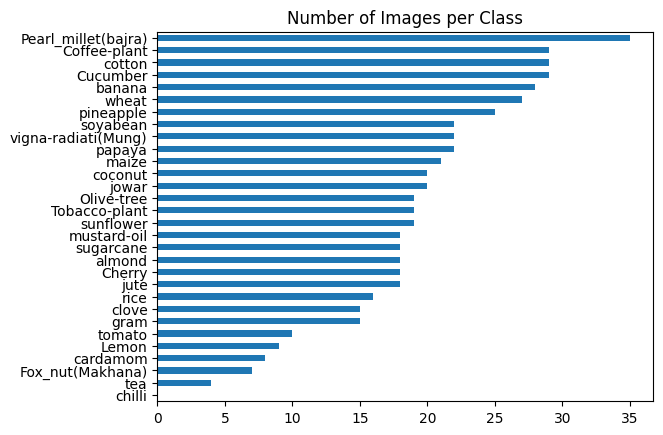

In [232]:
# Visualize the number of images per class
pd.Series(image_count).sort_values().plot(kind='barh')
plt.title('Number of Images per Class')
plt.show()

In [233]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [234]:
# Define parameters
IMG_SIZE = 224
BATCH_SIZE = 32

# Create an ImageDataGenerator for training, validation, and test sets
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.3,  # 70% training, 30% validation
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [235]:
# Training and validation generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 595 images belonging to 30 classes.
Found 234 images belonging to 30 classes.


In [236]:
import tensorflow as tf
import urllib.request
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [237]:
# Define the input layer with the required input shape
input_tensor = Input(shape=(224, 224, 3))

In [238]:
# Load MobileNetV2 with pre-trained weights

base_model = VGG16(weights='/kaggle/input/plantseedlings/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_tensor=input_tensor)

In [239]:
# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

In [240]:
# Add global average pooling after the base model
x = GlobalAveragePooling2D()(base_model.output)

# Add custom dense layers on top
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output_tensor = Dense(30, activation='softmax')(x)

In [241]:
model = Model(inputs=input_tensor, outputs=output_tensor)

In [242]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,790,558 (56.42 MB)

 Trainable params: 75,870 (296.37 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [243]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # or 'val_accuracy'
    patience=5,                # Number of epochs with no improvement
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',   # Monitor validation accuracy
    verbose=1,
    save_best_only=True,       # Save only the best model
    mode='max'                # Mode for monitoring, max for accuracy
)

In [244]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0632 - loss: 3.4863
Epoch 1: val_accuracy improved from -inf to 0.04274, saving model to best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 212s 11s/step - accuracy: 0.0624 - loss: 3.4868 - val_accuracy: 0.0427 - val_loss: 3.4884
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0663 - loss: 3.4848
Epoch 2: val_accuracy did not improve from 0.04274
19/19 ━━━━━━━━━━━━━━━━━━━━ 209s 11s/step - accuracy: 0.0649 - loss: 3.4853 - val_accuracy: 0.0385 - val_loss: 3.4834
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0388 - loss: 3.4534
Epoch 3: val_accuracy did not improve from 0.04274
19/19 ━━━━━━━━━━━━━━━━━━━━ 208s 11s/step - accuracy: 0.0390 - loss: 3.4548 - val_accuracy: 0.0299 - val_loss: 3.4755
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0422 - loss: 3.4636
Epoch 4: val_accuracy improved from 0.04274 to 0.05128, saving model to best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 208s 11s/step - accuracy

KeyboardInterrupt: 

In [245]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [246]:
# Load the best model
model.load_weights('best_model.keras')

In [247]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_acc}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.0457 - loss: 3.4784
Validation Accuracy: 0.04700854793190956


In [248]:
model.evaluate(val_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.0333 - loss: 3.4659


[3.4653258323669434, 0.05128205195069313]

In [249]:
# Predict on validation data
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step


In [250]:
# Classification report
print(classification_report(y_true, y_pred_classes, target_names=classes))

                     precision    recall  f1-score   support

             tomato       0.00      0.00      0.00         9
             chilli       0.00      0.00      0.00         8
              clove       0.00      0.00      0.00         9
          pineapple       0.00      0.00      0.00         6
vigna-radiati(Mung)       0.00      0.00      0.00         8
         Olive-tree       0.40      0.22      0.29         9
            coconut       0.00      0.00      0.00        11
             papaya       0.00      0.00      0.00         9
      Tobacco-plant       0.00      0.00      0.00         6
               jute       0.00      0.00      0.00         9
              jowar       0.00      0.00      0.00         6
               gram       0.00      0.00      0.00         6
                tea       0.00      0.00      0.00         9
              maize       0.00      0.00      0.00         7
              wheat       0.00      0.00      0.00         9
           soyabean    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


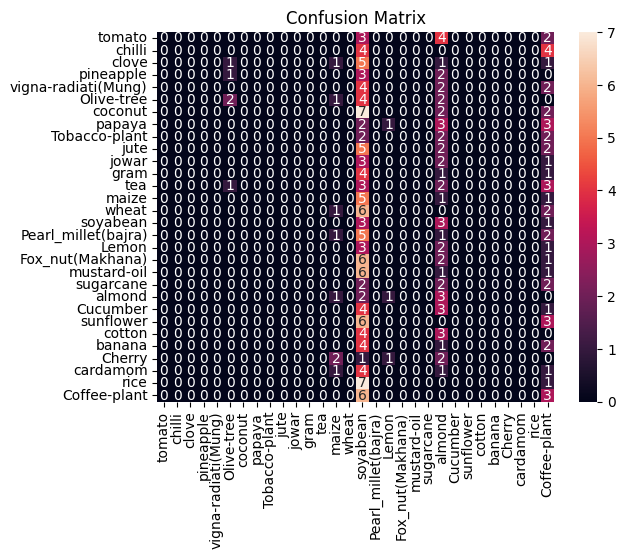

In [251]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.show()

In [252]:
# Unfreeze the last few layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

In [253]:
# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train again with the unfrozen model
history_fine_tune = model.fit(
    train_generator,
    epochs=10,  # Fine-tuning for a few more epochs
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.0265 - loss: 3.4494 
Epoch 1: val_accuracy improved from 0.05556 to 0.05983, saving model to best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 566s 29s/step - accuracy: 0.0268 - loss: 3.4485 - val_accuracy: 0.0598 - val_loss: 3.3624
Epoch 2/10
 9/19 ━━━━━━━━━━━━━━━━━━━━ 4:14 25s/step - accuracy: 0.1069 - loss: 3.3280

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Save the optimized and fine-tuned model
model.save('final_model.keras')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('final_model.keras')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess the input image
def preprocess_input_image(img_path, target_size=(224, 224)):
    
    # Load the image with target size
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert the image to an array
    img_array = image.img_to_array(img)
    
    # Expand dimensions to match the shape the model expects (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Rescale the image (if the model was trained with rescaling, like dividing by 255)
    img_array = img_array / 255.0
    return img_array

In [ ]:
# List of class names (replace with your actual class names)
class_names = ['tomato', 'chilli', 'clove', 'pineapple', 'vigna-radiati(Mung)', 'Olive-tree', 'papaya', 'Tobacco-plant', 'jute', 'jowar', 'gram', 'tea', 'maize', 'wheat', 'soyabean', 'Pearl_millet(bajra)', 'Lemon', 'Fox_nut(Makhana)', 'mustard-oil', 'sugarcane', 'almond', 'Cucumber', 'sunflower', 'cotton', 'banana', 'Cherry', 'cardamom', 'rice', 'Coffee-plant', 'coconut']

def predict_crop_type(img_path):
    # Preprocess the image
    img_array = preprocess_input_image(img_path)
    
    # Predict using the model
    predictions = model.predict(img_array)
    
    # Get the index of the highest probability class
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    # Map the index to the class name
    predicted_class = class_names[predicted_class_index]
    
    print(f'The predicted crop type is: {predicted_class}')

# Example usage
predict_crop_type('/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Cherry/image15.jpeg')

In [ ]:
import matplotlib.pyplot as plt

def display_image_with_prediction(img_path):
    # Load and preprocess the image
    img_array = preprocess_input_image(img_path)[0]  # Remove batch dimension
    
    # Predict crop type
    predicted_class = predict_crop_type(img_path)
    
    # Display the image
    plt.imshow(img_array)
    plt.title(f'Predicted Crop Type: {predicted_class}')
    plt.axis('off')
    plt.show()

# Example usage
display_image_with_prediction('/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Cherry/image15.jpeg')

In [ ]:
def predict_top_k(img_path, k=3):
    img_array = preprocess_input_image(img_path)
    predictions = model.predict(img_array)
    top_k_indices = np.argsort(predictions[0])[-k:][::-1]  # Indices of top K predictions
    top_k_classes = [class_names[i] for i in top_k_indices]
    top_k_probs = predictions[0][top_k_indices]
    
    print("Top K Predictions:")
    for i in range(k):
        print(f"{top_k_classes[i]}: {top_k_probs[i]*100:.2f}%")

In [ ]:
# Function to predict top K classes for an input image
def predict_top_k(img_path, k=3):
    
    # Step 1: Preprocess the image
    img_array = preprocess_input_image(img_path)
    print(f"Preprocessed image shape: {img_array.shape}")  # Debugging line

    # Step 2: Predict using the model
    predictions = model.predict(img_array, verbose=1)  # Add verbose for prediction status
    print(f"Raw Predictions: {predictions}")  # Debugging line

    # Step 3: Compute top K predictions
    top_k_indices = np.argsort(predictions[0])[-k:][::-1]
    print(f"Top K Indices: {top_k_indices}")  # Debugging line
    
    top_k_classes = [class_names[i] for i in top_k_indices]
    print(f"Top K Classes: {top_k_classes}")  # Debugging line

    top_k_probs = predictions[0][top_k_indices]
    print(f"Top K Probabilities: {top_k_probs}")  # Debugging line

    # Display Top K Predictions
    print("Top K Predictions:")
    for i in range(k):
        print(f"{top_k_classes[i]}: {top_k_probs[i] * 100:.2f}%")

In [ ]:
img_path = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Cherry/image15.jpeg'  # Replace with the path to your test image
predict_top_k(img_path, k=3)  # Predict the top 3 classes

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()